# 3.2 Relationships between Categorical Variables

In this section, we look at ways to summarize the relationship between two _categorical_ variables. To do this, we will again explore the Titanic data set.

In [1]:
%matplotlib inline

import pandas as pd
df = pd.read_csv("../data/titanic.csv")



**Documentation**

* Seaborn: https://seaborn.pydata.org/
* seaborn.heatmap(): https://seaborn.pydata.org/generated/seaborn.heatmap.html
* pandas.DataFrame.crosstab(): https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html


Suppose we want to understand the relationship between where a passenger embarked and what class they were in. We can completely summarize this variable by counting passengers by where they embarked and what class they were in. This is a job for `.groupby`.

In [3]:
embarked_pclass_counts = df.groupby(["embarked", "pclass"])["name"].count()
embarked_pclass_counts.reset_index()

embarked  pclass  name
0        C       1   141
1        C       2    28
2        C       3   101
3        Q       1     3
4        Q       2     7
5        Q       3   113
6        S       1   177
7        S       2   242
8        S       3   495

Right now, these counts are in tidy form. But they might be easier to read if they were in data cube form. To convert the counts from tidy form to data cube form, we can use `.unstack()`, as we learned in the previous chapter.

In [4]:
embarked_pclass_counts.unstack()

pclass      1    2    3
embarked               
C         141   28  101
Q           3    7  113
S         177  242  495

Tables that represent counts of two categorical variables are common enough that they have a special name: **contigency tables**. Contingency tables can also be obtained in one step using the `crosstab` function in `pandas`.

In [37]:
counts = pd.crosstab( df.embarked, df.pclass)

nPeople = df.embarked.count()

counts/nPeople


counts, nPeople

(pclass      1    2    3
 embarked               
 C         141   28  101
 Q           3    7  113
 S         177  242  495,
 1307)

## Joint Distributions

It is common to normalize the counts in a table so that they add up to 1. These proportions represent the **joint distribution** of the two variables---in this example, the location of embarkment and the passenger class.

To calculate the joint distribution, we need to divide the table of counts above by the total count. To find the total count, we call `.sum()` twice; the first call gives us the sum of each column, and the second call adds those numbers together.

In [35]:
df[(df.embarked != 'C') & (df.embarked!= 'S') & (df.embarked !='Q')]

pclass  survived                                       name     sex  \
168       1         1                        Icard, Miss. Amelie  female   
284       1         1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      age  sibsp  parch  ticket  fare cabin embarked boat  body  \
168  38.0      0      0  113572  80.0   B28      NaN    6   NaN   
284  62.0      0      0  113572  80.0   B28      NaN    6   NaN   

          home.dest  
168             NaN  
284  Cincinatti, OH

In [38]:
print(counts.sum().sum())
joint = counts / counts.sum().sum()
joint

1307


pclass           1         2         3
embarked                              
C         0.107881  0.021423  0.077276
Q         0.002295  0.005356  0.086458
S         0.135425  0.185157  0.378730

In [40]:
df.loc[1100]

pclass                                                 3
survived                                               0
name         Palsson, Mrs. Nils (Alma Cornelia Berglund)
sex                                               female
age                                                 29.0
sibsp                                                  0
parch                                                  4
ticket                                            349909
fare                                              21.075
cabin                                                NaN
embarked                                               S
boat                                                 NaN
body                                               206.0
home.dest                                            NaN
Name: 1100, dtype: object

Note that this is yet another example of broadcasting. When we divided the `DataFrame` `counts` by the number 1307, the division was applied elementwise to the entries of the `DataFrame` to produce another `DataFrame`.

## Marginal Distributions

The **marginal distribution** of a variable is simply the distribution of that variable, ignoring the other variables. Calculating the marginal distribution from the joint distribution is as simple as summing the rows or the columns.

To calculate the marginal distribution of `embarked`, we have to sum the joint distribution over the columns---in other words, _roll-up_ the `pclass` variable:

In [42]:
joint

pclass           1         2         3
embarked                              
C         0.107881  0.021423  0.077276
Q         0.002295  0.005356  0.086458
S         0.135425  0.185157  0.378730

In [41]:
joint.sum(axis=1)

embarked
C    0.206580
Q    0.094109
S    0.699311
dtype: float64

We can check this answer by calculating the distribution of `embarked` directly from the original data, ignoring `pclass` entirely.

In [48]:
embarked_counts = df.groupby("embarked")["name"].count()
#.groupby("embarked")["name"].count()
embarked_counts / embarked_counts.sum()

embarked
C    0.206580
Q    0.094109
S    0.699311
Name: name, dtype: float64

The numbers match!

Likewise, we calculate the marginal distribution of `pclass` by summing the joint distribution over the rows---in other words, by _rolling-up_ the `embarked` variable:

In [49]:
joint.sum(axis=0)

pclass
1    0.245601
2    0.211936
3    0.542464
dtype: float64

So given the joint distribution of two categorical variables, there are two marginal distributions we can calculate: one for each of the variables. These marginal distributions are obtained by summing the joint distribution table over either the rows or the columns.

The _marginal distribution_ is so-named because these row and column totals would typically be included alongside the joint distribution, as shown below---in other words, in the _margins_ of the table.

<img src="marginals.png" width="400">

## Conditional Distributions

The **conditional distribution** tells us about the distribution of one variable, _conditional on_ the value of another variable. For example, we might want to know the proportion of 3rd class passengers that embarked at each location. In other words, what is the distribution of where a passenger embarked, conditional on being in 3rd class?

The answer to this question is _not_ simply the "3rd class" column from the joint distribution.

In [53]:
counts

pclass      1    2    3
embarked               
C         141   28  101
Q           3    7  113
S         177  242  495

In [62]:
southhampton = counts.sum(axis=1).loc["S"]

shConditional = counts.loc["S"]/southhampton

In [67]:
shConditional, joint.sum()

(pclass
 1    0.193654
 2    0.264770
 3    0.541575
 Name: S, dtype: float64,
 pclass
 1    0.245601
 2    0.211936
 3    0.542464
 dtype: float64)

In [66]:
joint[3], joint[3].sum()

(embarked
 C    0.077276
 Q    0.086458
 S    0.378730
 Name: 3, dtype: float64,
 0.5424636572302983)

In [69]:
joint[3].sum()

0.5424636572302983

Although the numbers above are indeed for 3rd class passengers, they represent proportions among _all_ passengers, not proportions among just 3rd class passengers. We have to normalize these proportions by the overall proportion of 3rd class passengers.

In [70]:
joint[3] / joint[3].sum(), (joint[3]/joint[3].sum()).sum()

(embarked
 C    0.142454
 Q    0.159379
 S    0.698166
 Name: 3, dtype: float64,
 1.0)

Notice that these three proportions add up to 1, making this a proper distribution.

We just calculated _one_ of the conditional distributions of `embarked`: the distribution conditional on being in 3rd class. There are also conditional distributions of `embarked`, conditional on being in 1st class and conditional on being in 2nd class. It is common to report _all_ of the conditional distributions of one variable given another variable.

Of course, we can calculate these conditional distributions separately:

In [13]:
joint[1] / joint[1].sum()

embarked
C    0.439252
Q    0.009346
S    0.551402
Name: 1, dtype: float64

In [14]:
joint[2] / joint[2].sum()

embarked
C    0.101083
Q    0.025271
S    0.873646
Name: 2, dtype: float64

But there is a nifty trick that allows us to calculate all of the conditional distributions at once. Notice that:

In [71]:
joint

pclass           1         2         3
embarked                              
C         0.107881  0.021423  0.077276
Q         0.002295  0.005356  0.086458
S         0.135425  0.185157  0.378730

In [72]:
pclass = joint.sum(axis=0)
pclass

pclass
1    0.245601
2    0.211936
3    0.542464
dtype: float64

In [73]:
joint/pclass

pclass           1         2         3
embarked                              
C         0.439252  0.101083  0.142454
Q         0.009346  0.025271  0.159379
S         0.551402  0.873646  0.698166

gives us the numbers we need to divide each column of `joint` by. To accomplish this division of a `DataFrame` by a `Series`, we use the `.divide()` method of `DataFrame` and specify the axis along which to align `pclass` to `joint`.

In [74]:
cond = joint.divide(pclass, axis=1)
cond

pclass           1         2         3
embarked                              
C         0.439252  0.101083  0.142454
Q         0.009346  0.025271  0.159379
S         0.551402  0.873646  0.698166

Notice that these numbers match the ones we obtained earlier. Notice also that each column sums to 1, a reminder that each column represents a separate distribution. 

When comparing numbers across distributions, it pays to be cautious. For example, the 87.4% and the 69.8% in the "Southampton" row represent percentages of different populations. Just because 87.4% is higher than 69.8% does not mean that more 2nd class passengers boarded at Southampton than 3rd class passengers. In fact, if we go back to the original contingency table, we see that more 3rd class passengers actually boarded at Southampton than 2nd class passengers!

There is also another set of conditional distributions for these two variables that we have not mentioned yet: the conditional distributions of class, conditional on where they embarked. These conditional distributions answer questions like, "What percentage of Southampton passengers were in 1st, 2nd, and 3rd class?" 

To calculate these conditional distributions, we need to first obtain the marginal distribution of `embarked` and then divide each _row_ by these marginal proportions. To do this, we have to align the `Series` with the row index (`axis=0`) of the `DataFrame`.

In [75]:
embarked = joint.sum(axis=1)
joint.divide(embarked, axis=0)

pclass           1         2         3
embarked                              
C         0.522222  0.103704  0.374074
Q         0.024390  0.056911  0.918699
S         0.193654  0.264770  0.541575

Notice that these proportions are _not_ the same as the proportions for the other set of conditional distributions. That is because the questions:

- What percentage of passengers who embarked at Southampton were in 3rd class?
- What percentage of passengers in 3rd class embarked at Southampton?

are fundamentally different. In general, the conditional distributions of A given B are not the same as the conditional distributions of B given A. This is why it is important to pay close attention to the wording of the question that is being asked.

## Visualization

Finally, we discuss some strategies for visualizing joint and conditional distributions of two categorical variables. (Marginal distributions are summaries of a single variable and can be visualized using the techniques from Chapter 1.)

To visualize a joint distribution, we need to be able to represent three dimensions: two dimensions for the two categorical variables and a third dimension for the proportions. Although one option is a 3D graph, humans are not good at judging the sizes of 3D objects printed on a page. For this reason, **heat maps**, which use a color scale to represent the third dimension, are usually preferred. 

Unfortunately, heatmaps are not built into `pandas` (yet). But the `seaborn` library provides a `heatmap` function that works well with `pandas` `DataFrame`s.

<AxesSubplot:xlabel='pclass', ylabel='embarked'>

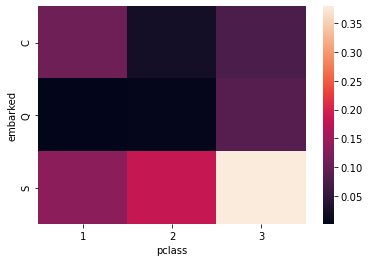

In [76]:
import seaborn as sns
sns.heatmap(joint)

A heat map encourages comparison across cells. So we see that 3rd class passengers who embarked at Southampton were by far the most common.

Although a heat map can also be used to visualize conditional distributions, it is not ideal because it does not tell us which variable we are conditioning on, and it is difficult to judge visually which dimension sums to 1. A stacked bar graph is better because it actually shows values summing to 1.

To plot the conditional distributions of `embarked` given `pclass`, we want `pclass` to be on the $x$-axis so that when we stack the different-colored bars for `embarked`, their total height is 1.0. 

Recall that `.plot.bar()` automatically places the index of the `DataFrame` on the $x$-axis, so we need `pclass` to be the index. But is it?

In [19]:
cond

pclass           1         2         3
embarked                              
C         0.439252  0.101083  0.142454
Q         0.009346  0.025271  0.159379
S         0.551402  0.873646  0.698166

It seems that `embarked` is currently the index. To make `pclass` the index (and `embarked` the columns), we can **transpose** this `DataFrame`. The syntax for transposing a `DataFrame` is `.T`, which is inspired by the notation for transposing a matrix in linear algebra.

In [20]:
cond.T

embarked         C         Q         S
pclass                                
1         0.439252  0.009346  0.551402
2         0.101083  0.025271  0.873646
3         0.142454  0.159379  0.698166

Now the `DataFrame` is in a form, ready to be plotted by `.plot.bar()`. We specify `stacked=True` to force the bars to be on top of one another, instead of side by side.

<AxesSubplot:xlabel='pclass'>

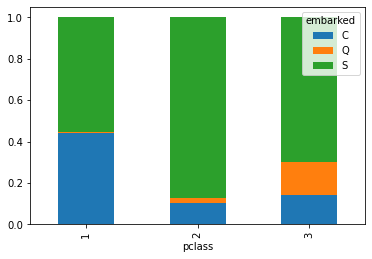

In [21]:
(cond.T).plot.bar(stacked=True)

# Exercises

Exercises 1-4 deal with the Tips data set (`/data301/data/tips.csv`).

**Exercise 1.** Make a visualization that displays the relationship between the day of the week and party size.

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 2.** Calculate the marginal distribution of day of week in two different ways.

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 3.** Make a visualization that displays the conditional distribution of party size, given the day of the week.

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 4.** What proportion of Saturday parties had 2 people? Is this the same as the proportion of 2-person parties that dined on Saturday?

In [ ]:
# ENTER YOUR CODE HERE

**Challenge Exercise.** We discussed above that the conditional distributions of A given B and the conditional distributions of B given A are _not_ the same. Can you figure out a way to relate the two? Can you write code that will convert a table with the conditional distributions of A given B, into a table with the conditional distributions of B given A?

In [ ]:
# ENTER YOUR CODE HERE

**Submission Instructions**


Submit using the following command:

            handin dekhtyar 301-lab06